## **Scrapping Data**

In [ ]:
#Instal google play scrapper
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import package yang diperlukan
from google_play_scraper import app
import json
import pandas as pd
from tqdm import tqdm
import numpy as np

In [ ]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 2500 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.google.android.apps.maps',
    lang='id', # defaults to 'id' untuk bahasa indonesia
    country='id', # defaults to 'id' untuk negara indonesia
    sort=Sort.NEWEST, # sort berdasarkan yang paling relevan bisa juga gunakan M Sort.NEWEST untuk mendapatkan yang terbaru
    count=2500, # defaults to 2500
    filter_score_with=None # gunakan untuk memfilter score yang didapat
)

In [ ]:
#buat menjadi kolom berdasarkan nama kolomnya dengan pandas, dan numpy
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
#menampilkan sebagian dari variabel df
df_busu.head()

In [ ]:
#untuk mengetahui banyak data yang berhasil di dapat dalam tabel
len(df_busu.index)

In [ ]:
#preview userName, rating, tanggal (at), and reviews(content)
df_busu[['userName', 'score','at', 'content']].head()

In [ ]:
 #ambil hanya userName, rating, date-time(at), and reviews(content)
my_df = df_busu[['userName', 'score','at', 'content']]

In [ ]:
#mengexport data dari pd dataframe ke csv dan excel
my_df.to_excel("scrapped_data.xlsx", header=True, index = False)
my_df.to_csv("scrapped_data.csv", header=True, index = False)

# **Preprocessing**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scrapped_data.csv to scrapped_data (1).csv


In [ ]:
#Import Data
import pandas as pd
# Local directory
data = pd.read_excel('scrapped_data_1.xlsx')

In [ ]:
data.head()

,userName,score,at,content
0,wahyu iskandar,1,2023-02-12 02:41:53,Akurasi rendah parah. Linimasa seringkali tdk ...
1,Wari Metal,5,2023-02-12 02:29:55,Saya pengen.melihat desa Kr Suwung
2,Sudirman,5,2023-02-12 02:15:21,"Kadang akurat kadang tidak, tolong perbaiki ya"
3,Trumon Mala,1,2023-02-12 02:12:52,Asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,Chomet,5,2023-02-12 02:09:34,Sangat membantu


In [ ]:
#Deskripsi Data
data.shape
data.sample(5)
data.describe()
data['content'].value_counts()

Ok                            170
Mantap                        104
Bagus                          84
Good                           59
Sangat membantu                58
                             ... 
Bgudddds                        1
Lelet                           1
Sangat membantu..               1
Lebih mudah                     1
memudahkan perjalanan kita      1
Name: content, Length: 1704, dtype: int64

In [ ]:
data['userName'].value_counts()

Pengguna Google                    11
Budi Hartono                        3
Franky Kana                         2
Rudi Anto                           2
Sri Wahyuni                         2
                                   ..
hijrah anak jalanan tasikmalaya     1
Muhammad Hakim Surya                1
Ahmad Mudawim                       1
Donvhie                             1
Rifkki Fauzi                        1
Name: userName, Length: 2481, dtype: int64

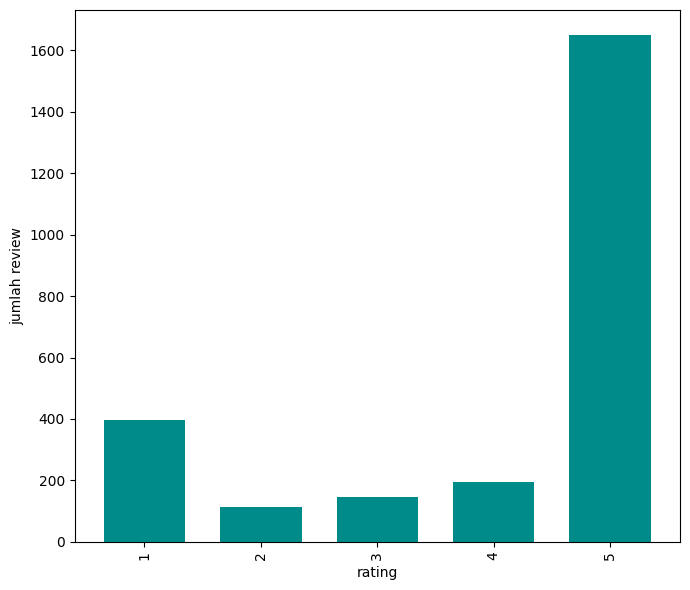

5    1649
1     396
4     194
3     147
2     114
Name: score, dtype: int64

In [ ]:
#melihat distribusi banyak ulasan berdasar rating
import matplotlib.pyplot as plt
_, ax1 = plt.subplots(figsize=(7,6))
stars_histogram = data['score'].value_counts().sort_index()
stars_histogram.plot(kind='bar', width=0.7, color='darkcyan')
plt.xlabel('rating')
plt.ylabel('jumlah review')
plt.tight_layout()
plt.show()
data.drop(columns=['userName'], inplace = True)
data['score'].value_counts()

Case Folding

In [ ]:
#CASE FOLDING
#mengubah semua huruf dalam dokumen menjadi huruf kecil (lower text)
data['content'].to_string() #mengubah data ke dalam bentuk string atau huruf
data['content'] = data['content'].str.lower()
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,akurasi rendah parah. linimasa seringkali tdk ...
1,5,2023-02-12 02:29:55,saya pengen.melihat desa kr suwung
2,5,2023-02-12 02:15:21,"kadang akurat kadang tidak, tolong perbaiki ya"
3,1,2023-02-12 02:12:52,asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,5,2023-02-12 02:09:34,sangat membantu


Cleansing

In [ ]:
#pembersihan teks dari tab, new line, back slice, mention, link, hashtag, URL
import string
import re #regex library
def remove_ulasan_special(text):
  #menghapus tab, new line, dan back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace ('\\u'," ").replace('\\',"")
  #menghapus mention, link, hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ",str(text)).split())
  #menghapus incomplete URL return
  text.replace("http://", " ").replace("https://", " ")
#data['content'] = data['content'].apply(remove_ulasan_special)
remove_ulasan_special(data['content'])
data.to_csv('cleansing.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,akurasi rendah parah. linimasa seringkali tdk ...
1,5,2023-02-12 02:29:55,saya pengen.melihat desa kr suwung
2,5,2023-02-12 02:15:21,"kadang akurat kadang tidak, tolong perbaiki ya"
3,1,2023-02-12 02:12:52,asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,5,2023-02-12 02:09:34,sangat membantu


In [ ]:
#menghapus angka
def remove_emoji(text):
  return re.sub(r'\\u[a-zA-Z0-9]{4}', ' ', str(text))
def remove_number(text):
  return re.sub(r"\d+", "", str(text))
data['content'] = data['content'].apply(remove_number)
data.to_csv('remove number.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,akurasi rendah parah. linimasa seringkali tdk ...
1,5,2023-02-12 02:29:55,saya pengen.melihat desa kr suwung
2,5,2023-02-12 02:15:21,"kadang akurat kadang tidak, tolong perbaiki ya"
3,1,2023-02-12 02:12:52,asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,5,2023-02-12 02:09:34,sangat membantu


In [ ]:
#menghapus tanda baca
def remove_punctuation(text):
  return text.translate(str.maketrans(" "," ",string.punctuation))
data['content'] = data['content'].apply(remove_punctuation)
data.to_csv('remove punctuation.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,akurasi rendah parah linimasa seringkali tdk s...
1,5,2023-02-12 02:29:55,saya pengenmelihat desa kr suwung
2,5,2023-02-12 02:15:21,kadang akurat kadang tidak tolong perbaiki ya
3,1,2023-02-12 02:12:52,asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,5,2023-02-12 02:09:34,sangat membantu


In [ ]:
#menghapus huruf tunggal
def remove_singl_char(text):
  return re.sub(r"\b[a-zA-Z]\b","",str(text))
# data['ulasan'] - data['ulasan'].apply(remove_singl_char)
remove_singl_char(data['content'])
data.to_csv('remove single char.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,akurasi rendah parah linimasa seringkali tdk s...
1,5,2023-02-12 02:29:55,saya pengenmelihat desa kr suwung
2,5,2023-02-12 02:15:21,kadang akurat kadang tidak tolong perbaiki ya
3,1,2023-02-12 02:12:52,asaaaaaaaaaasaaaaaaaaaaa ada aaassssasaaaaasaa...
4,5,2023-02-12 02:09:34,sangat membantu


Tokenization

In [ ]:
#pemisahan teks menjadi potonganpotongan kata yang disebut sebagai token
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
#NLTK word tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['content'] = data['content'].apply(word_tokenize_wrapper)
data.to_csv('tokenization.csv')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,score,at,content
0,1,2023-02-12 02:41:53,"[akurasi, rendah, parah, linimasa, seringkali,..."
1,5,2023-02-12 02:29:55,"[saya, pengenmelihat, desa, kr, suwung]"
2,5,2023-02-12 02:15:21,"[kadang, akurat, kadang, tidak, tolong, perbai..."
3,1,2023-02-12 02:12:52,"[asaaaaaaaaaasaaaaaaaaaaa, ada, aaassssasaaaaa..."
4,5,2023-02-12 02:09:34,"[sangat, membantu]"


Spelling Correction

In [ ]:
#menyeragamkan kata yang memiliki makna yang sama namun penulisannya berbeda
normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
  if row[0] not in normalizad_word_dict:
    normalizad_word_dict[row[0]] = row[1]
def normalized_term(document):
  return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
data['content'] = data['content'].apply(normalized_term)
data.to_csv('spelling corection.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,"[akurasi, rendah, parah, linimasa, seringkali,..."
1,5,2023-02-12 02:29:55,"[saya, pengenmelihat, desa, kr, suwung]"
2,5,2023-02-12 02:15:21,"[kadang, akurat, kadang, tidak, tolong, perbai..."
3,1,2023-02-12 02:12:52,"[asaaaaaaaaaasaaaaaaaaaaa, ada, aaassssasaaaaa..."
4,5,2023-02-12 02:09:34,"[sangat, membantu]"


Filtering

In [ ]:
#memfilter untuk mengambil katakata penting dengan menggunakan algoritma stoplist (membuang kata kurang penting)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
#dapatkan stopword indonesia dari NLTK stopword
list_stopwords = stopwords.words('indonesian')
#menambahkan stopword tambahan
list_stopwords.extend(['aplikasi','isi','ktp','woy','woi','lah','cuy','pengen','kemudian','gas','yok','x','ig','da','pas', 'ya','chat','gitu','donk','sih', 'deh', 'loh', 'oiya', 'nih', 'ok','tlp','gini','juli','ah','iya','si','wa','nya','ke','dana','email','salah','indomaret','gk','up','top','yahh','hyy','yg','yang','ajah','rupiah','adu','kak','nyaa','ky','ovo','gopay','cc','d','tgl','jam','alfamart','wib','eh','wey','lu','gua','bet','k','ue','poko','akun','guys','assalamualaikum','hub','ttep','kya','ni','laaah','nominal','kpd','topup','via','tik','or','ribu','apps','shopee','bukalapak','yth','hey','tolol','g','sich','la','awowkwowkok','hp','bot','banget','vhoucher','bug','dewaaaaaaa','hallo','gan','lo','so','kemarin','gaynnn','kontol','of','the','app','this','dll','dsb','negara','emak','mah','sept','mulu','september','oktober','eeh','ny','y','juta','jt','yyy','luu','ko','ccr', 'admin','daya','gb','min','hatur','hello','poto','doang','doank','bulak','e','huuuu','hmmm','nt','pura','user','kali','bank','yaa','bro','ker','rip','fakkkkk','bintang','kasih','cair','oy','gi','mna','stuck','selalu','bri','allah','tuhan','bni','syariah','asaaaaaaaaaasaaaaaaaaaaa','aaassssasaaaaasaaaaaaaaaaaaaaaaaaaaaasaaaaassaaasaaaaaaasasa','klik','begitu','mlh','DAxAZxfdtd','hai','yah','jam','bulan','desember','november','🤗🤷❤️🎉','👍👍','transfer','pin','🙏🏻','👍🏻','😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍','🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️','','alfa','alfamart','indomart','lazada','ð¤ð¤·â¤ï¸ð','oololkijkooi','cyrus','cucu4dévetdbsűrűcnzsxtncb','fxxc','d','🤔😘😘😘😅😘','👍👍👍👍👍'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#menambahkan stopword dari file csv
txt_stopword = pd.read_csv('stopword.txt', header=None, names=['stopwords'], sep="\t")
#mengkonversi kata stopword tambahan & stopword pada file csv ke list
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
#mengkonversi list ke dictionary
list_stopwords = set(list_stopwords)
#menghapus stopword pada data
def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]
data['content'] = data['content'].apply(stopwords_removal)
data.to_csv('filtering.csv')
data.to_csv('hasil Preprocessing.csv')
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,"[akurasi, rendah, parah, linimasa, seringkali,..."
1,5,2023-02-12 02:29:55,"[pengenmelihat, desa, kr, suwung]"
2,5,2023-02-12 02:15:21,"[kadang, akurat, kadang, tolong, perbaiki]"
3,1,2023-02-12 02:12:52,[]
4,5,2023-02-12 02:09:34,[membantu]


Load hasil Preprocessing

In [ ]:
#load data hasil Preprocessing ke dalam dataframe
import pandas as pd
import numpy as np
data = pd.read_csv('hasil Preprocessing.csv',usecols=['content','score','at'])
data.columns = ['score','at','content']
data.head()

,score,at,content
0,1,2023-02-12 02:41:53,"['akurasi', 'rendah', 'parah', 'linimasa', 'se..."
1,5,2023-02-12 02:29:55,"['pengenmelihat', 'desa', 'kr', 'suwung']"
2,5,2023-02-12 02:15:21,"['kadang', 'akurat', 'kadang', 'tolong', 'perb..."
3,1,2023-02-12 02:12:52,[]
4,5,2023-02-12 02:09:34,['membantu']


In [ ]:
#menggabungkan daftar token menjadi dokumen string tunggal
import ast
def join_text_list(texts):
  texts = ast.literal_eval(texts)
  return ' '.join([text for text in texts])
data['content'] = data['content'].apply(join_text_list)
data.head()
data.to_csv('hasil.csv')
import difflib
#body_list = data['body'].tolist()
review_text_list = data['content'].tolist()
#body = body_list
reviews = review_text_list
# s - difflib.SquenceMatcher(None, reviews).ratio()
s = difflib.SequenceMatcher(None, reviews).ratio()
print ("ratio:", s,"\n")

ratio: 0.0 



# Pembobotan TF IDF

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


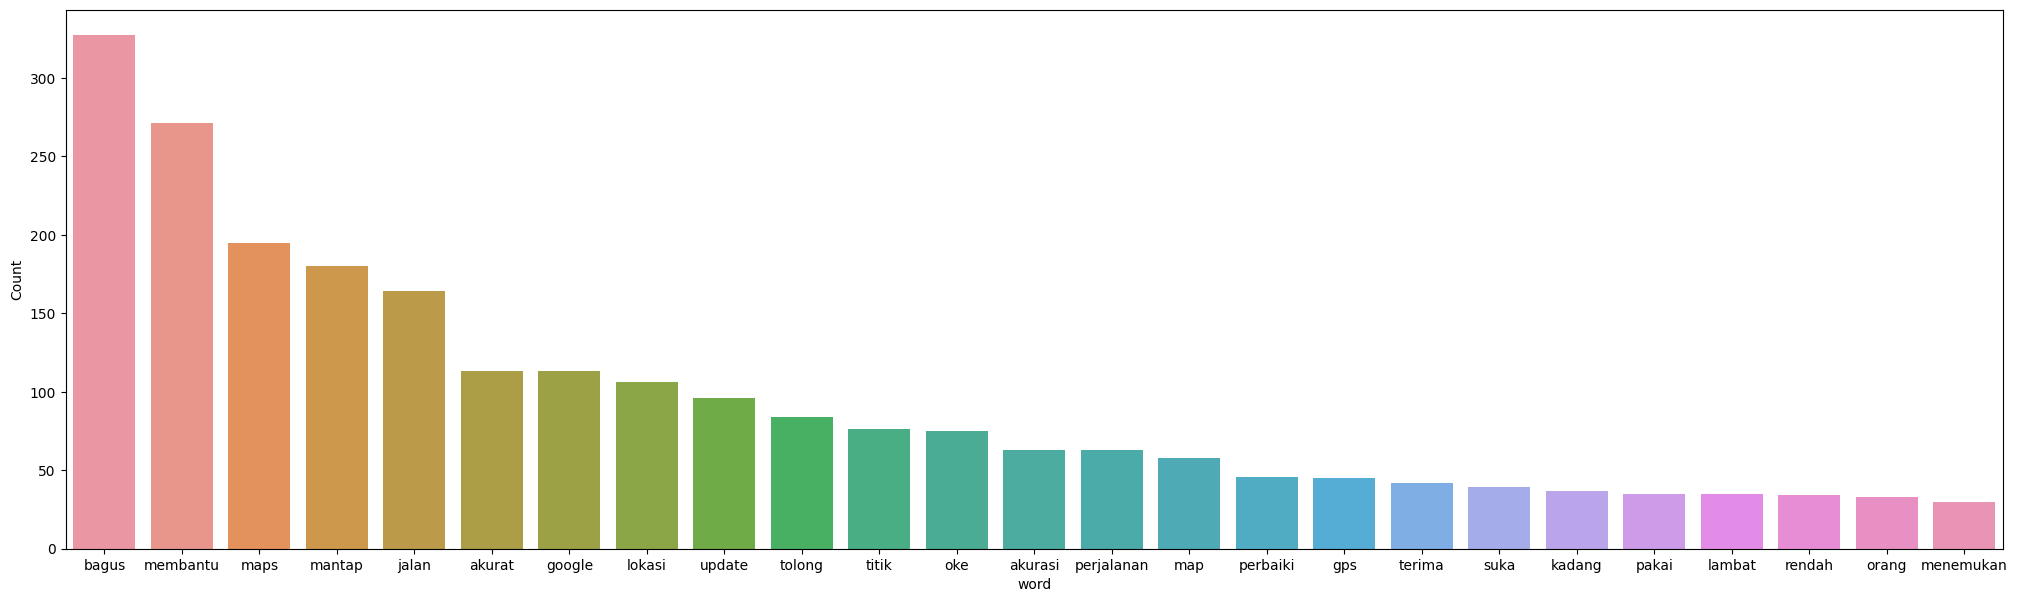

sparse matrix shape: (2500, 145)
nonzero count: 3856
sparsity: 1.06%


,term,occurrences
10,bagus,327
76,membantu,278
72,maps,196
68,mantap,182
43,jalan,164
3,akurat,113
37,google,113
63,lokasi,106
143,update,96
139,tolong,84


In [ ]:
#FUNGSI PLOT TERM YANG SERING MUNCUL
from nltk import FreqDist
import seaborn as sns

#def freq_words(x,term = 30):
def freq_words(x,terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  words_data = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  #pilih 25 term yang sering muncul
  d = words_data.nlargest(columns="count", n = terms)
  plt.figure(figsize=(25,7))
  # ax = sns barplot(data-d, x = "word", y = "count")
  ax = sns.barplot(data=d, x = "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
#PLOT TERM YANG SERING MUNCUL
freq_words(data['content'],25)
#pembobotan kata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# cvec = CountVectorizer(stop_words='english', min_data=1, max_data=.5 , ngram_range=(1,2))
cvec = CountVectorizer(stop_words='english',min_df=1, max_df=.5 , ngram_range=(1,2))
cvec

#menghitung semua n-gram yang ditemukan disemua dokumen
from itertools import islice
from nltk.corpus import stopwords
global str
cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(), 20))
len(cvec.vocabulary_)

# cvec = CountVectorizer(stop_words='english', min_data=0025, max_data=.5 , ngram_range=(1,2))
cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.5 , ngram_range=(1,2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

# cvec_counts = cvec.transfrom(review_text_list)
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

#menghitung frekuensi kemunculan term
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_data = pd.DataFrame({'term': cvec.get_feature_names_out(),'occurrences': occ})
counts_data.to_csv('remove single char.csv')
counts_data.sort_values(by='occurrences', ascending=False).head(20)

In [ ]:
#perhitungan dengan TF-IDF
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

#melihat 20 term teratas dengan weight rata-rata TFIDF
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_data = pd.DataFrame({'term': cvec.get_feature_names_out(),'weight': weights})
weights_data.sort_values(by='weight', ascending=False).head(20)

,term,weight
10,bagus,0.109627
76,membantu,0.075705
68,mantap,0.065383
72,maps,0.031396
95,oke,0.029151
3,akurat,0.026957
43,jalan,0.023116
143,update,0.019988
63,lokasi,0.018546
37,google,0.018403


# Pelabelan Ulasan

In [ ]:
#Instal Package
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 16.0 MB/s eta 0:00:00


In [ ]:
#Membuat Kamus kata
word_dict = {}
for i in range(0,len(data['content'])):
  sentence = data['content'][i]
  word_token = word_tokenize(sentence)
  for j in word_token:
    if j not in word_dict:
      word_dict[j] = 1
    else:
      word_dict[j] += 1
len(word_dict)
len({k:v for (k,v) in word_dict.items() if v < 4})

2367

In [ ]:
#import lexicon dan hapus kata kata negasi dari lexicon
import pandas as pd
lexicon = dict()
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.reset_index(drop = True)
len(lexicon)
lexicon.head(10)
lexicon_word = lexicon['word'].to_list()
lexicon_num_words =lexicon['number_of_words']
len(lexicon_word)

10252

In [ ]:
#memeriksa kata yang tidak terdapat pada kamus lexicon
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
  if word not in lexicon_word:
    kata_dasar = stemmer.stem(word)
    if kata_dasar not in lexicon_word:
      ns_words.append(word)
len(ns_words)

1911

In [ ]:
#memeriksa kata yang memiliki banyak kemunculan karena kemungkinan bukan case
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words) & (v>3)) }
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders = sort_orders[0:20]
for i in sort_orders:
  print(i[0], i[1])

maps 195
jalan 164
akurat 113
google 113
lokasi 106
update 96
akurasi 63
perjalanan 63
map 58
gps 45
pakai 35
orang 33
biru 29
sinyal 23
keren 22
apk 21
bikin 21
jos 20
motor 20
driver 19


In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
sentiment_list = []
# berfungsi untuk menulis sentimen kata
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # jika sudah termasuk dalam bag of words matrix, maka tinggal menambah nilainya
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #jika tidak, menambahkan kata baru
        sencol.append(word)
        sen.append(1)
        add += 1
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen,sencol,sentiment,add

# memeriksa setiap kata, jika mereka muncul dalam leksikon, dan kemudian menghitung sentimen mereka jika mereka muncul
for i in range(len(data)):
    nsen = senrow.shape[0]
    words = word_tokenize(data["content"][i])
    sentiment = 0
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]

    for word in words:
        ind = words.index(word)
# periksa apakah mereka termasuk dalam leksikon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # jika masih negatif, coba cocokkan kombinasi kata dengan kata yang berdekatan
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    if add>0:
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # jika tidak ada maka perbarui saja matriks lama
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))

    sentiment_list.append(sentiment)

In [ ]:
#membangun kerangka data yang berisi sekumpulan kata yang telah dihitung sebelumnya
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
data_sen= pd.DataFrame(sentiment_data,columns = sencol)
data_sen_1=data_sen
data_sen.head(20)

,rendah,parah,sesuai,kadang,tolong,baik,membantu,mengarahkan,suruh,potong,...,love,melenceng,gabung,help,mati,jembatan,delay,najis,tertinggal,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,-5
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_sen_1

,rendah,parah,sesuai,kadang,tolong,baik,membantu,mengarahkan,suruh,potong,...,love,melenceng,gabung,help,mati,jembatan,delay,najis,tertinggal,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
#melihat sentiment data original
res_data = pd.DataFrame([])
res_data['score'] = data['score'].copy()
res_data['content'] = data['content'].copy()
res_data['at'] = data['at'].copy()
res_data['sentiment'] = data_sen['sentiment'].copy()
res_data.head(30)

,score,content,at,sentiment
0,1,akurasi rendah parah linimasa seringkali sesuai,2023-02-12 02:41:53,-7
1,5,pengenmelihat desa kr suwung,2023-02-12 02:29:55,0
2,5,kadang akurat kadang tolong perbaiki,2023-02-12 02:15:21,12
3,1,,2023-02-12 02:12:52,0
4,5,membantu,2023-02-12 02:09:34,4
5,5,,2023-02-12 02:06:57,0
6,1,maps mengarahkan kejurang jalan suruh mutar su...,2023-02-12 02:05:05,-5
7,4,,2023-02-12 01:40:19,0
8,5,jos,2023-02-12 01:28:58,0
9,1,jelasssss,2023-02-12 01:15:08,0


In [ ]:
#Eksport data
res_data.to_csv("nilai_sentimen.csv", header=True, index = False)
res_data.to_excel("nilai_sentimen.xlsx", header=True, index= False)

In [ ]:
#mengubah penilaian jadi label
#label data negatif(0) jika nilai <0,0 dan label data positif(1) jika nilai >=0,0
label = []
for index, row in res_data.iterrows():
  if row["score"]>3:
    label.append(1)
  elif row['score']==3:
    if row['sentiment']>=0:
      label.append(1)
    else:
      label.append(0)
  else:
    label.append(0)
res_data["label"] = label
res_data.head(40)

,score,content,at,sentiment,label
0,1,akurasi rendah parah linimasa seringkali sesuai,2023-02-12 02:41:53,-7,0
1,5,pengenmelihat desa kr suwung,2023-02-12 02:29:55,0,1
2,5,kadang akurat kadang tolong perbaiki,2023-02-12 02:15:21,12,1
3,1,,2023-02-12 02:12:52,0,0
4,5,membantu,2023-02-12 02:09:34,4,1
5,5,,2023-02-12 02:06:57,0,1
6,1,maps mengarahkan kejurang jalan suruh mutar su...,2023-02-12 02:05:05,-5,0
7,4,,2023-02-12 01:40:19,0,1
8,5,jos,2023-02-12 01:28:58,0,1
9,1,jelasssss,2023-02-12 01:15:08,0,0


In [ ]:
#Eksport data
res_data.to_csv("pelabelan_sentimen.csv", header=True, index = False)
res_data.to_excel("pelabelan_sentimen.xlsx", header=True, index= False)

In [ ]:
#IMPORT DATA
import pandas as pd
res_data = pd.read_csv("pelabelan_sentimen.csv")
#melihat banyak label positif(1) dan negatif(0)
res_data['label'].value_counts()

1    1952
0     548
Name: label, dtype: int64

In [ ]:
res_data=res_data.dropna(axis='rows')
res_data['label'].value_counts()

1    1659
0     533
Name: label, dtype: int64

# Data Training dan testing

In [ ]:
res_data.head()

,score,content,at,sentiment,label
0,1,akurasi rendah parah linimasa seringkali sesuai,2023-02-12 02:41:53,-7,0
1,5,pengenmelihat desa kr suwung,2023-02-12 02:29:55,0,1
2,5,kadang akurat kadang tolong perbaiki,2023-02-12 02:15:21,12,1
4,5,membantu,2023-02-12 02:09:34,4,1
6,1,maps mengarahkan kejurang jalan suruh mutar su...,2023-02-12 02:05:05,-5,0


In [ ]:
#Menghapus Kolom yang tidak perlu
X=res_data.drop(columns = ['label', 'content', 'at'])
Y=res_data['label']
klasifikasi = res_data
klasifikasi = res_data.drop(columns=['score','at','sentiment'])
klasifikasi.head()
#instal Package klasifikasi
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
len(klasifikasi)

2192

In [ ]:
X.head()

,score,sentiment
0,1,-7
1,5,0
2,5,12
4,5,4
6,1,-5


In [ ]:
#data training dan data testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(klasifikasi['content'],klasifikasi['label'], test_size=0.2, random_state=42)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
#TFIDF Feature
Tfidf_vect = TfidfVectorizer(max_features=5000)
#Tfidf_vect.fit(klasifikasi['content'])
Tfidf_vect.fit(klasifikasi['content'].values.astype('U'))
X_train_Tfidf = Tfidf_vect.transform(X_train.values.astype('U'))
X_test_Tfidf = Tfidf_vect.transform(X_test.values.astype('U'))
X_train_Tfidf.shape

(1753, 2511)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1753,), (1753,), (439,), (439,))

In [ ]:
X_test.head()

447                            kereen maju pantang mundur
621                          lambat berfikir gogle mapnya
1412    bikin pusingbikin emosi google map skarang mah...
250                  jonni mami thailand ming percaya oke
1595                                  suka bikin tersesat
Name: content, dtype: object

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
X_train.head()

1690                                               mantap
194                            membantu arah titik lokasi
2081                                      gogele maps oke
1774    mohon didetailkan informasinya didepan jalan l...
661                                                 bagus
Name: content, dtype: object

# Naive Bayes CLassifier

In [ ]:
#Naive Bayes Classifier
from sklearn import naive_bayes
import matplotlib.pyplot as plt
NB = naive_bayes.MultinomialNB()
NB.fit(X_train_Tfidf,y_train)
predictions_NB = NB.predict(X_test_Tfidf)
print("NB Accuracy Score -> {:.2%} ".format(accuracy_score(predictions_NB, y_test)))
#precision
print("NB Precision score -> ", precision_score(predictions_NB,y_test)*100)
#recall
print("Recall score hasil prediksi adalah -> ", recall_score(y_test,predictions_NB))
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import classification_report
print ("\nHere is the classification report:")
print (classification_report(y_test, predictions_NB))

NB Accuracy Score -> 77.22% 
NB Precision score ->  98.46625766871165
Recall score hasil prediksi adalah ->  0.9846625766871165

Here is the classification report:
              precision    recall  f1-score   support

           0       0.78      0.16      0.26       113
           1       0.77      0.98      0.87       326

    accuracy                           0.77       439
   macro avg       0.78      0.57      0.56       439
weighted avg       0.77      0.77      0.71       439



In [ ]:
#Bar plot for reviews
labels = ['Positive','Negative']
Category1 = [334, 101]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Jumlah Data')
plt.title('Diagram Bar Data Testing Analisis Sentimen')
plt.show()
#pie chart for data testing reviews
color = ['coral', 'c']
plt.pie(Category1, labels=labels, colors=color,startangle=90,shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Klasifikasi Analisis Sentimen')
plt.legend()
plt.show()

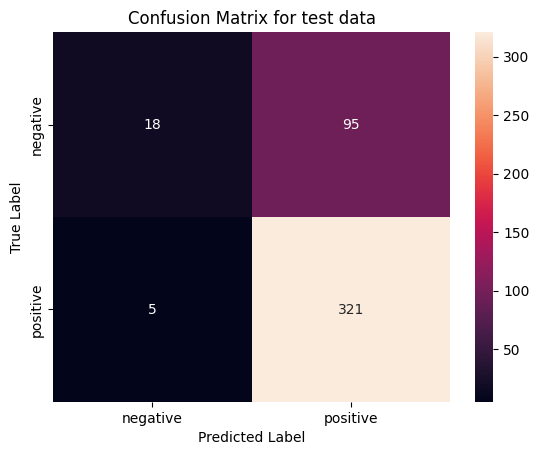

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, predictions_NB)
class_label = ["negative", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Akurasi
print("Accuration score hasil prediksi adalah")
print(accuracy_score(y_test,predictions_NB))
#precision
print("Precision score hasil prediksi adalah")
print(precision_score(y_test,predictions_NB))
#recall
print("Recall score hasil prediksi adalah")
print(recall_score(y_test,predictions_NB))

Accuration score hasil prediksi adalah
0.7722095671981777
Precision score hasil prediksi adalah
0.7716346153846154
Recall score hasil prediksi adalah
0.9846625766871165


# KNN

In [ ]:
#import package knn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

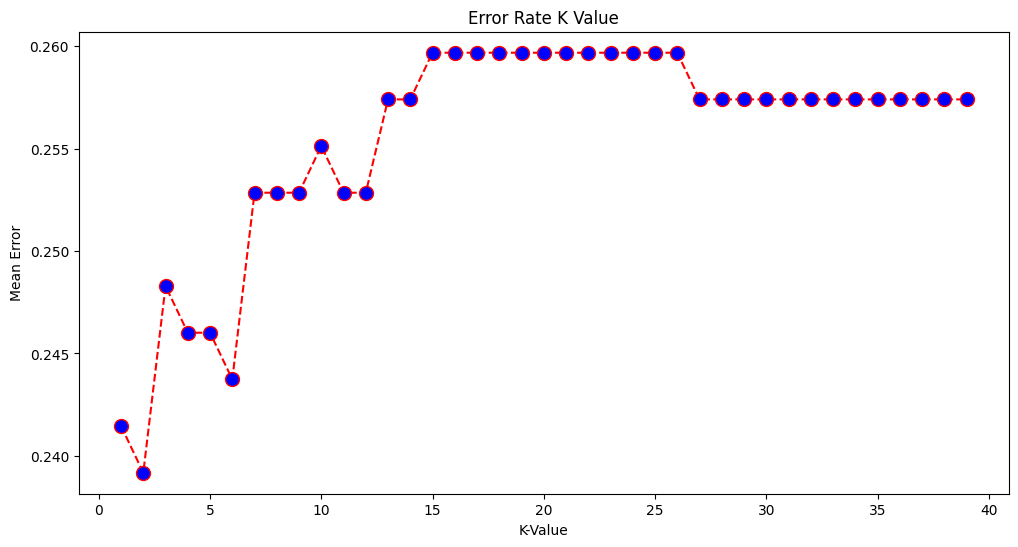

In [ ]:
#Mencari nilai K terbaik
error =[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_Tfidf, y_train)
  pred_i = knn.predict(X_test_Tfidf)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K-Value')
plt.ylabel("Mean Error")

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train_Tfidf,y_train)
prediksi_KNN=KNN.predict(X_test_Tfidf)

In [ ]:
#Akurasi
print("Accuration score hasil prediksi adalah")
print(accuracy_score(y_test,prediksi_KNN))
#precision
print("Precision score hasil prediksi adalah")
print(precision_score(y_test,prediksi_KNN))
#recall
print("Recall score hasil prediksi adalah")
print(recall_score(y_test,prediksi_KNN))

Accuration score hasil prediksi adalah
0.7608200455580866
Precision score hasil prediksi adalah
0.782608695652174
Recall score hasil prediksi adalah
0.9386503067484663


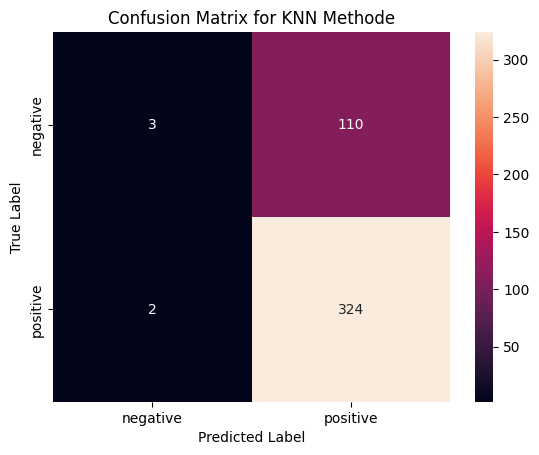

In [ ]:
#Confusion Matriks
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_KNN=confusion_matrix(y_test,prediksi_KNN)
class_label = ["negative", "positive"]
test2 = pd.DataFrame(confusion_KNN, index = class_label, columns = class_label)
sns.heatmap(test2, annot = True,fmt="d")
plt.title("Confusion Matrix for KNN Methode")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Wordcloud

Sentimen Negatif

In [ ]:
ulasannegatif=klasifikasi.loc[klasifikasi['label']==0]
ulasannegatif=ulasannegatif.dropna(axis='rows')
ulasannegatif.head()

,content,label
0,akurasi rendah parah linimasa seringkali sesuai,0
6,maps mengarahkan kejurang jalan suruh mutar su...,0
9,jelasssss,0
14,semenjak update google mapsku dipakai enak goo...,0
15,hancur nunjukin arahnya,0


In [ ]:
len(ulasannegatif)

534

In [ ]:
import difflib
#body_list = df['body'].tolist()
negatif_text=ulasannegatif['content'].tolist()
#body=body_list
review_negatif = negatif_text

In [ ]:
#stopword
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopword= stopwords.words('indonesian')
print(len(stopword))
text_negatif=str(negatif_text)

758


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#tokenizing
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
token_negatif=word_tokenize(text_negatif)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#filter out stopword
from nltk.corpus import stopwords
stopworddd=set(stopwords.words('indonesian'))
negatif=[w for w in token_negatif if not w in stopworddd]
negatif=[nltk.stem.WordNetLemmatizer().lemmatize(word) for word in negatif]

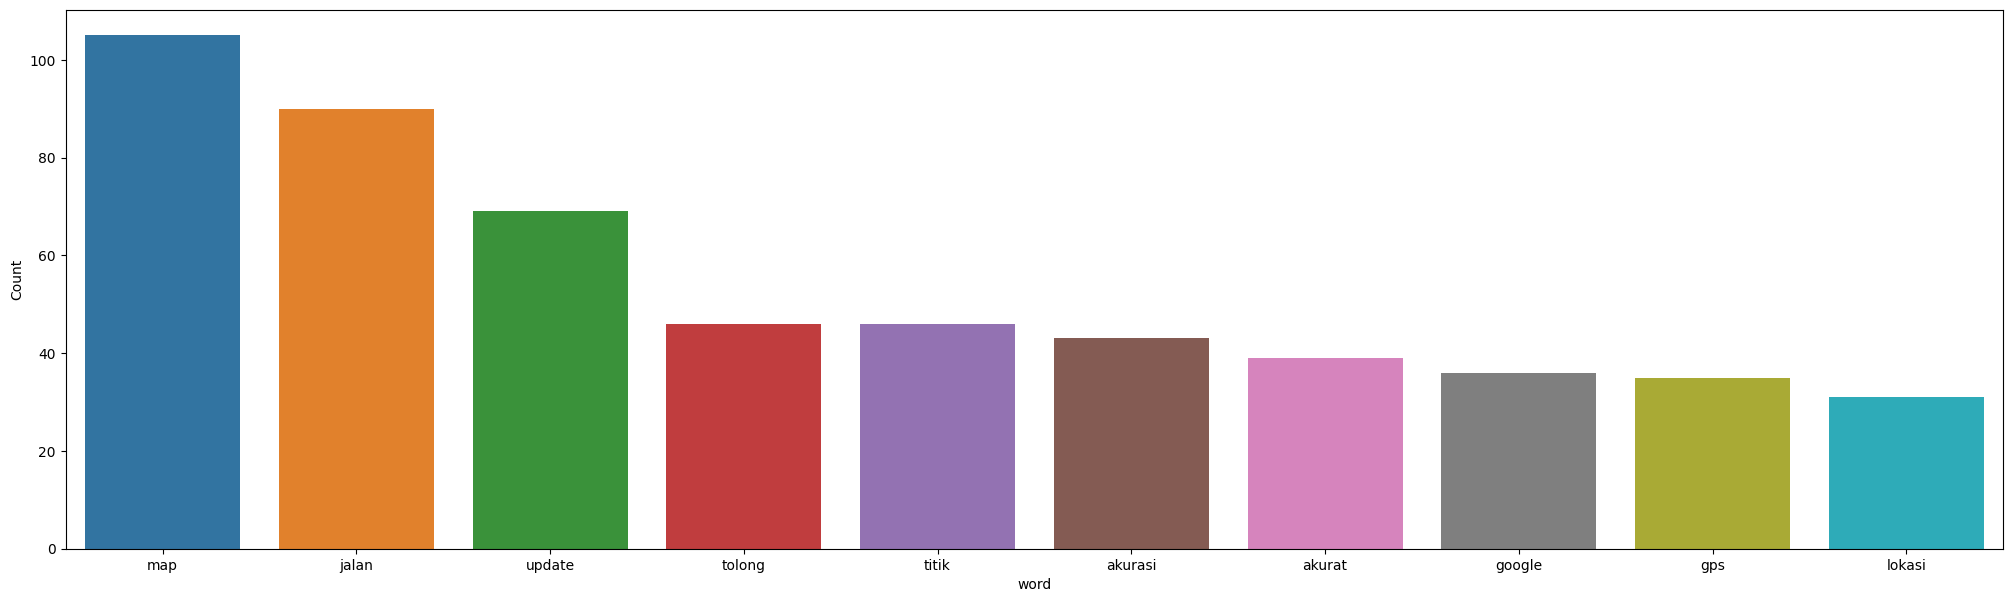

In [ ]:
import string
table = str.maketrans('','', string.punctuation)
strippedneg= [w.translate(table) for w in negatif]
#ploting kata negatif yang sering muncul
freq_words(strippedneg,10)

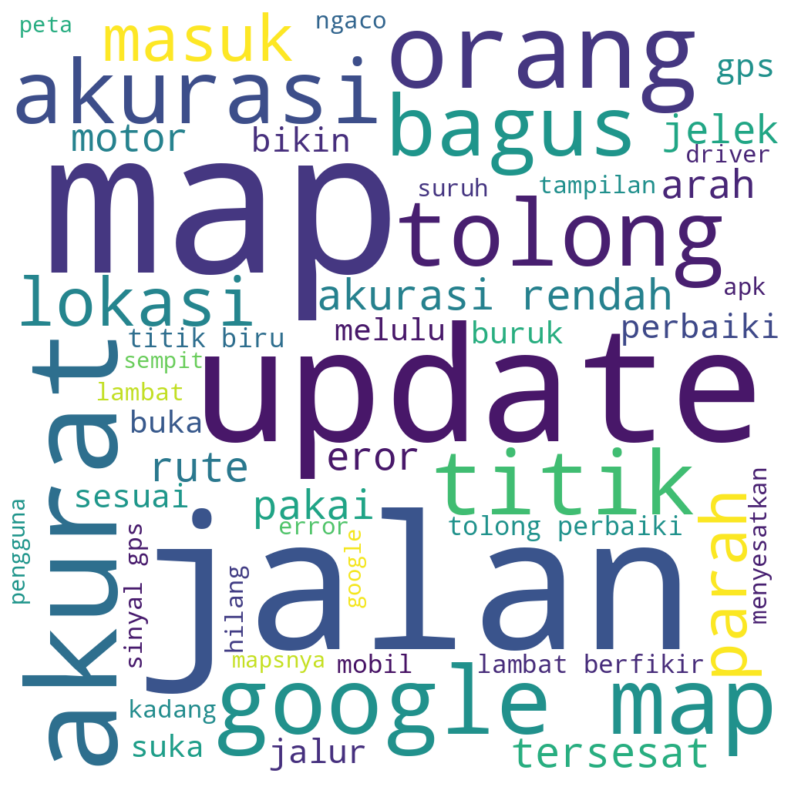

In [ ]:
#Word CLoud Negatif
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
WC_negatif=' '.join(str(word) for word in strippedneg)
wordcloud=WordCloud(max_font_size=260, max_words=50, width=1000, height=1000, mode='RGBA', background_color='white').generate(WC_negatif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Sentimen Positif

In [ ]:
ulasanpositif=klasifikasi.loc[klasifikasi['label']==1]
ulasanpositif=ulasanpositif.dropna(axis='rows')
ulasanpositif.head()

,content,label
1,pengenmelihat desa kr suwung,1
2,kadang akurat kadang tolong perbaiki,1
4,membantu,1
8,jos,1
10,mengatasi,1


In [ ]:
len(ulasanpositif)

1660

In [ ]:
import difflib
#body_list = df['body'].tolist()
positif_text=ulasanpositif['content'].tolist()
#body=body_list
review_positif = positif_text

In [ ]:
#stopword
from nltk.corpus import stopwords
stopword= stopwords.words('indonesian')
print(len(stopword))
text_positif=str(positif_text)

758


In [ ]:
#tokenizing
from nltk.tokenize import word_tokenize
token_positif=word_tokenize(text_positif)

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#filter out stopword
from nltk.corpus import stopwords
stopworddd=set(stopwords.words('indonesian'))
positif=[w for w in token_positif if not w in stopworddd]
positif=[nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positif]

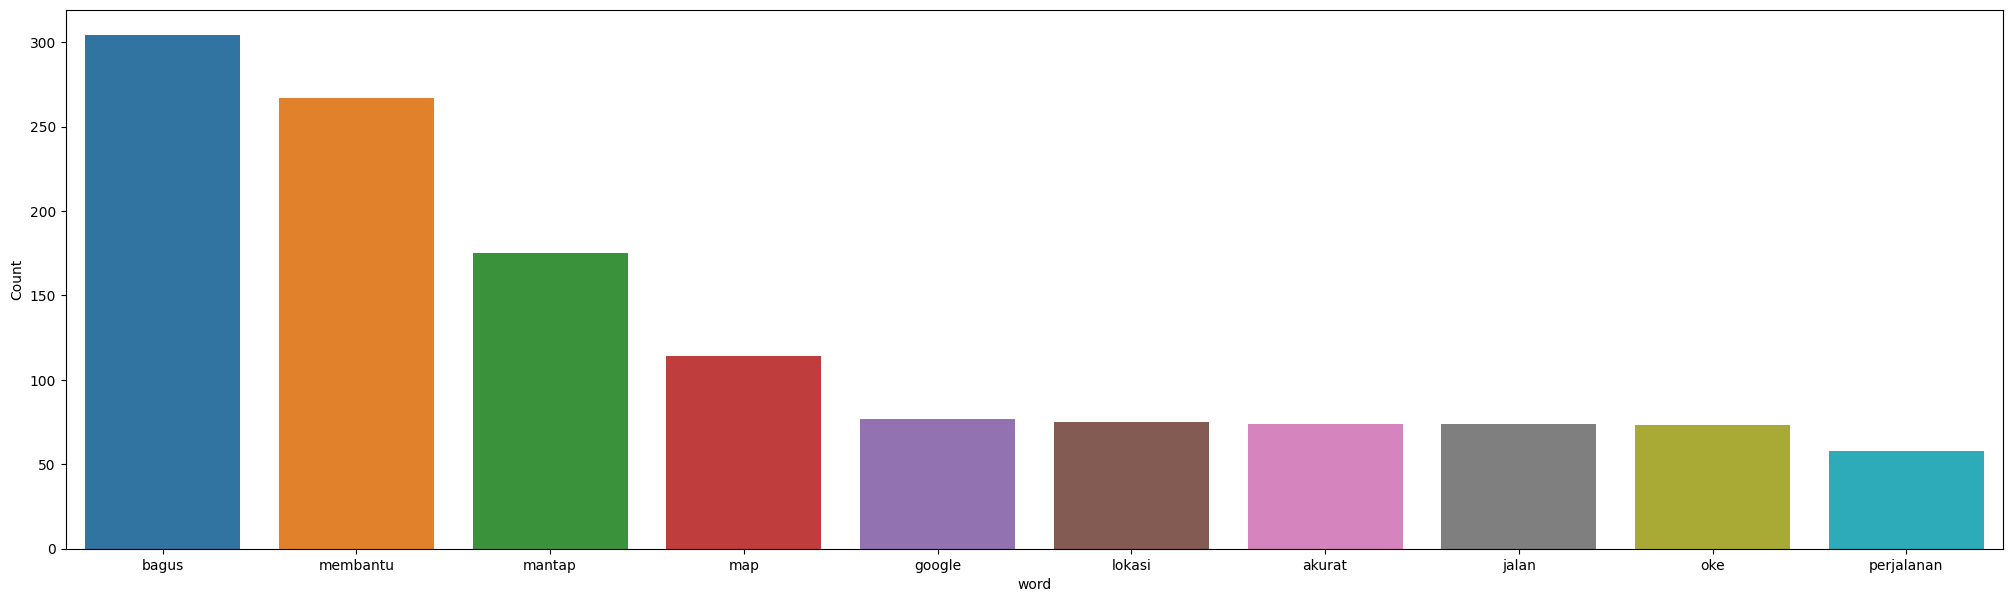

In [ ]:
import string
table = str.maketrans('','', string.punctuation)
strippedneg= [w.translate(table) for w in positif]
#ploting kata positif yang sering muncul
freq_words(strippedneg,10)

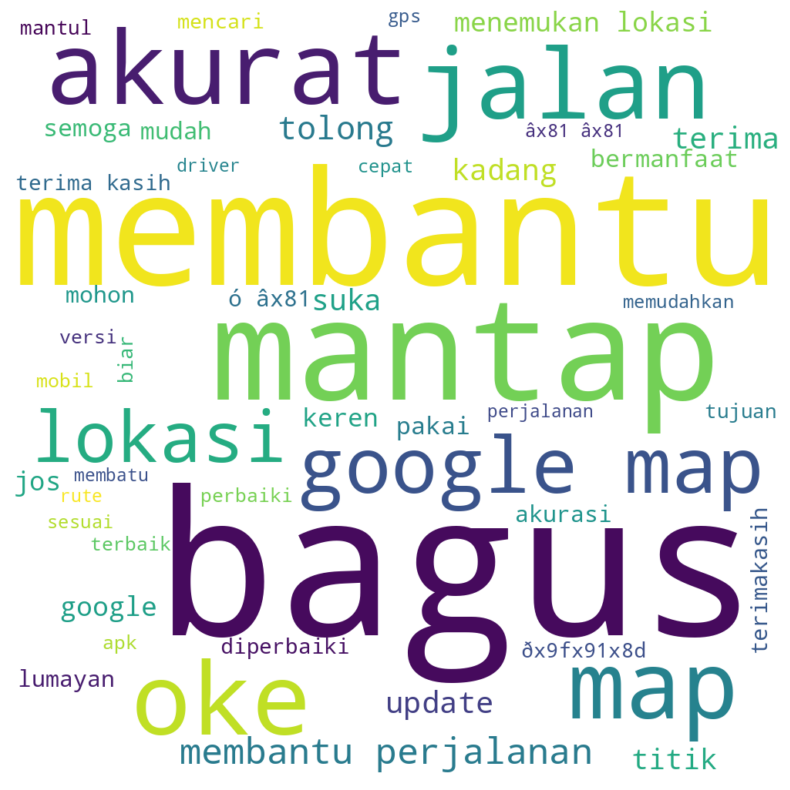

In [ ]:
#Word CLoud positif
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
WC_positif=' '.join(str(word) for word in strippedneg)
wordcloud=WordCloud(max_font_size=260, max_words=50, width=1000, height=1000, mode='RGBA', background_color='white').generate(WC_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()